# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
print(df.shape)

(50000, 12)


# Data Cleaning

In [4]:
print(df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None city                         0
trips_in_first_30_days       0
signup_date

In [5]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

There are many missing values for the avg_rating_of_driver column.  Looking at the breakdown of driver ratings, 50% have average ratings of 4.9 or higher, and 75% have a rating of 4.3 or higher.  One simple and common practice is to replace missing values with the median or mean.  In this case the median seems more appropriate since the mean is more affected by the outliers.

In [6]:
# Fill in missing avg_rating_of_driver values with the median value
median_arod = df['avg_rating_of_driver'].median()
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(median_arod)
df['avg_rating_of_driver'].isna().sum()

0

There are also missing values for phone and avg_rating_by_driver.  Phone is a categorical value so the distribution of the categories will need to be looked at to see the best way to fill in these values.  The avg_rating_by_driver data is numerical and will be approached the same as the avg_rating_of_driver data.

In [7]:
df['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

In [8]:
df['phone'].describe()

count      49604
unique         2
top       iPhone
freq       34582
Name: phone, dtype: object

In [9]:
# the majority of users have iPhones, so the missing data will be filled in with iPhone
df['phone'] = df['phone'].fillna('iPhone')
df['phone'].isna().sum()

0

In [10]:
df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [11]:
# Replace nulls with the median
median_arbd = df['avg_rating_by_driver'].median()
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(median_arbd)
df['avg_rating_by_driver'].isna().sum()

0

In [12]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

Now that there is no missing data, the columns signup_date and last_trip_date currently have object dtype and need to be converted to datetime dtype.

In [13]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

The last easy thing to check is the city column.  Since this column contains city names, it could be easy to have several variations of the same city.  For example 'New York', 'new york', 'NY', etc.

In [14]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

It appears that no changes to the city names are necessary.  With the data now cleaned, it is time to start Exploratory Data Analysis.

# Exploratory Data Analysis

This section is about understanding the data and what it represents before processing it and creating a model.

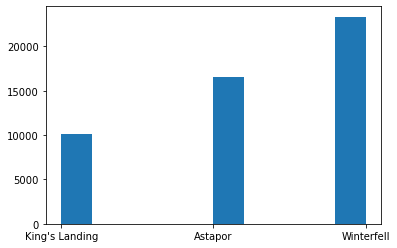

In [15]:
# Visualize distribution of users in different cities
plt.hist(df['city'])
plt.show();

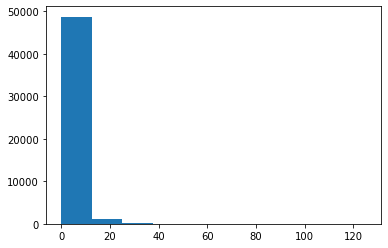

In [16]:
# Visualize trips in the first 30 days
plt.hist(df['trips_in_first_30_days'])
plt.show();

By default plt.hist uses a range of (x.min(), x.max()) so it appears there are some outliers as who took up to 130 trips in the first 30 days.  The vast majority of the users took 10 or fewer trips in the first 30 days, with a quickly decreasing number taking up to 40 trips.  The users who took many more trips than this should be identified to see if the data is legitimate or if there may have been typos.

In [17]:
df['trips_in_first_30_days'].describe()

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

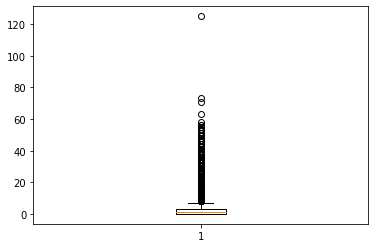

In [18]:
plt.boxplot(df['trips_in_first_30_days'])
plt.show();

There are many outliers in the trips_in_first_30_days data, and removing these may help to better represent the majority of users.  Using the mean and std from the data, rows further than 3 standard deviations above the mean will be identified.  Since the mean is so close to 0 I am only concerned with the upper bound, as the lower bound would be a negative value.

In [19]:
first30_mean = df['trips_in_first_30_days'].mean()
first30_std = df['trips_in_first_30_days'].std()
first30_upper = first30_mean + 3*first30_std
first30_upper

13.656252207710947

In [20]:
# Find users who took more than 14 trips in the first 30 days
first30_outliers = df.loc[df['trips_in_first_30_days'] > 14]
first30_outliers

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
38,King's Landing,24,2014-01-22,4.9,1.04,2014-06-30,iPhone,5.8,True,61.6,4.69,4.8
99,Astapor,73,2014-01-27,4.9,1.00,2014-03-05,Android,0.0,True,89.7,2.86,4.9
200,Winterfell,22,2014-01-11,4.6,1.02,2014-06-29,iPhone,2.7,True,83.8,2.34,4.6
312,King's Landing,15,2014-01-26,4.8,1.06,2014-06-30,Android,11.7,True,60.0,2.48,4.9
367,King's Landing,22,2014-01-07,4.8,1.08,2014-05-05,Android,11.1,True,88.9,6.07,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
49397,Winterfell,19,2014-01-24,4.6,1.08,2014-06-28,iPhone,11.9,True,49.2,3.84,4.8
49503,King's Landing,21,2014-01-05,4.7,1.00,2014-02-01,iPhone,0.0,True,81.0,13.89,4.8
49518,Winterfell,20,2014-01-10,5.0,1.02,2014-06-30,iPhone,2.5,True,61.0,1.94,4.7
49756,King's Landing,21,2014-01-22,4.9,1.00,2014-06-26,iPhone,0.0,True,59.7,4.38,4.9


In [21]:
# Count how many of these frequent riders are ultimate black users
freq_ult_black = first30_outliers[first30_outliers['ultimate_black_user']==True].shape[0]

# Count how many of all riders are ultimate black users
all_ult_black = df[df['ultimate_black_user']==True].shape[0]

print(freq_ult_black, all_ult_black)

593 18854


Removing 935 rows is not the best option even though they are considered outliers for the number of rides they took in the first 30 days.  63.4% of them are ultimate black users whereas only 37.7% of all users are ultimate black users.  Perhaps the people who use the service most are more likely to use the premium service.

Given the number of outliers, it seems more appropriate to look at where the distribution of rides really gets less dense, in this case above 40 rides in the first 30 days.

In [22]:
# Find users who took more than 40 trips in the first 30 days
first30_outliers_40 = df.loc[df['trips_in_first_30_days'] > 40]
first30_outliers_40.shape[0]

35

In [23]:
# Remove the 35 users who took more than 40 trips in the first 30 days
outliers_index = first30_outliers_40.index
df = df.drop(outliers_index)
df.shape

(49965, 12)

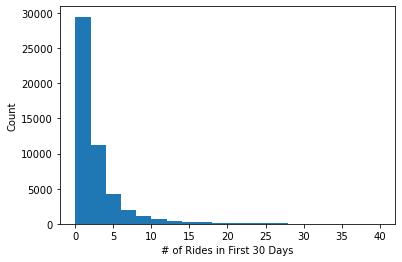

In [24]:
# Plot the new distribution that represents the majority of riders
plt.hist(df['trips_in_first_30_days'], bins=20)
plt.xlabel('# of Rides in First 30 Days')
plt.ylabel('Count')
plt.show();

Now it is clear to see that the majority of riders took only 1 trip in the first 30 days.  One possible reason for this is that they signed up to use the service for a specific reason, for example getting home from a concert late at night when public transportation was not available.  Users who do this might sign up to use the service once and then go back to their daily life driving their car or taking the bus, subway, walking, etc.  Looking at the signup_date and the last_trip_date may help to determine how active users tend to be.

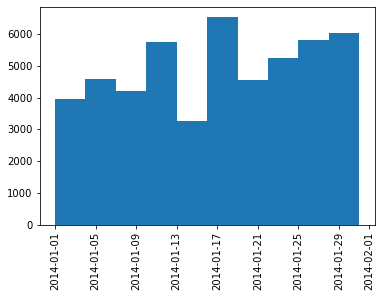

In [25]:
# Look at the distribution of signup_date
plt.hist(df['signup_date'])
plt.xticks(rotation=90)
plt.show();

All users in this dataset signed up at some point in January 2014, with no clear pattern.

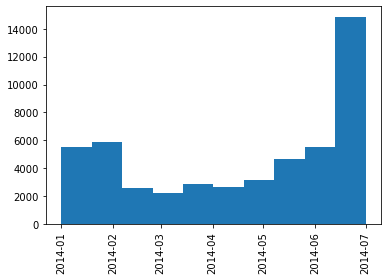

In [26]:
plt.hist(df['last_trip_date'])
plt.xticks(rotation=90)
plt.show();

Roughly 1/3 of all users who signed up in January 2014 used the service as recently as July 2014.  However, the next largest chunk of users who signed up in January stopped using the service by February 2014, with the remaining users stopping at various times between February and June 2014.

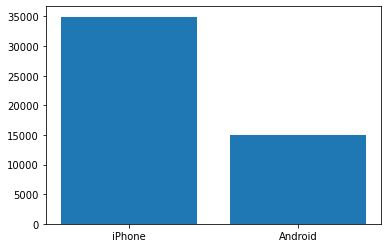

In [27]:
# See which type of phone users tend to use
plt.bar(df['phone'].unique(), df['phone'].value_counts())
plt.show();

As was already known from the data cleaning portion of this notebook, most users use iPhones.  It should also be noted that the 396 users for which phone data was missing, iPhone was added.  This number is small compared to the roughly 20,000 count difference between users with iPhones and users with Androids.

In [28]:
# Look at summary statistics for surge_pct
df['surge_pct'].describe()

count    49965.000000
mean         8.850734
std         19.965011
min          0.000000
25%          0.000000
50%          0.000000
75%          8.600000
max        100.000000
Name: surge_pct, dtype: float64

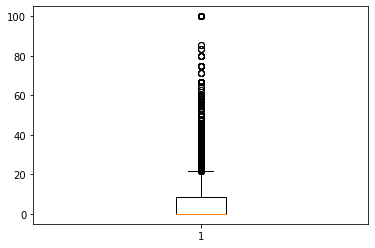

In [29]:
# Visualize the distribution of surge_pct
plt.boxplot(df['surge_pct'])
plt.show();

Once again there appear to be some outliers in this data, with some users only taking rides with surge multipliers present.  In this case over 75% of riders have a surge_pct value lower than the mean.  Once again I will look to drop some data so that this dataset represents the majority of riders and is not affected as strongly by outliers.

In [30]:
surge_mean = df['surge_pct'].mean()
surge_std = df['surge_pct'].std()
surge_upper = surge_mean + 3*surge_std
surge_upper

68.74576713602245

This time, 3 standard deviations is actually fairly close to where the density of the outliers thins out, so any users with surge_pct eqaul to or greater than 69% will be dropped.

In [31]:
surge_outliers = df[df['surge_pct'] >= 69]
df = df.drop(surge_outliers.index)
df.shape

(48494, 12)

In [32]:
df['avg_surge'].describe()

count    48494.000000
mean         1.049511
std          0.124437
min          1.000000
25%          1.000000
50%          1.000000
75%          1.040000
max          3.000000
Name: avg_surge, dtype: float64

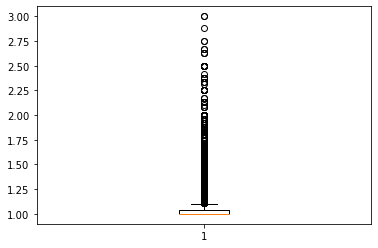

In [33]:
# Visualize the avg_surge for users
plt.boxplot(df['avg_surge'])
plt.show();

In this case I will not drop any data for avg_surge outliers.  There is no data for the total number of rides a user has taken since signing up, and so this may be very valuable information.  It may be that a user who only used the service once experienced a surge multiplier of 3 and then quit using the service because they were upset.  Also, since more than 75% of users have a avg_surge of 1.04 or lower (essentially meaning that all or most of their rides did not have a multiplied rate) these outliers may be useful in predicting users who stopped using the service.

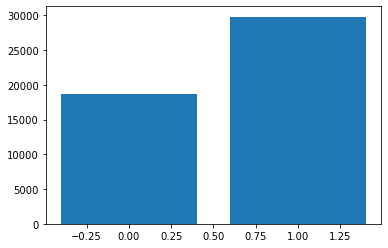

In [34]:
# Visualize the number of ultimate black users and non-ultimate black users
plt.bar(df['ultimate_black_user'].unique(), df['ultimate_black_user'].value_counts())
plt.show();

Note that in this plot 0 corresponds to "True" and 1 corresponds to "False".  This is because the .unique() method outputs an array [True, False] so True is the first value on the x axis, here shown at 0.  This is confirmed in the cell below.  The majority of users (61.4%) are not ultimate black users.

In [35]:
df['ultimate_black_user'].unique()

array([ True, False])

In [36]:
df['ultimate_black_user'].value_counts()

False    29802
True     18692
Name: ultimate_black_user, dtype: int64

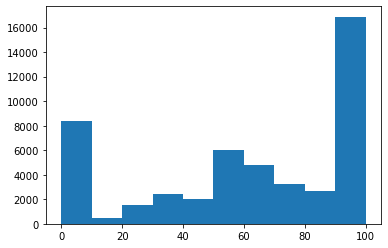

In [37]:
# Visualize the weekday_pct distribution
plt.hist(df['weekday_pct'])
plt.show();

More than 16000 users tend to use the service almost exclusively on the weekdays.  There is also a significant number of users who barely use the service on the weekdays (over 8000 such users).  The rest of the users tend to use a relatively equal mixture of weekday and weekend rides.

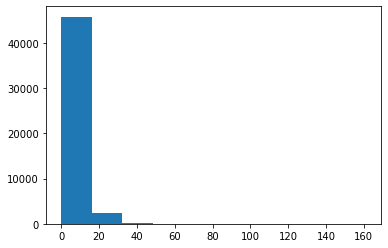

In [38]:
# Visualize the avg_dist
plt.hist(df['avg_dist'])
plt.show();

In [39]:
df['avg_dist'].describe()

count    48494.000000
mean         5.824066
std          5.729334
min          0.000000
25%          2.440000
50%          3.910000
75%          6.980000
max        160.960000
Name: avg_dist, dtype: float64

Once again there are some large outliers in this data.  In this case the vast majority of users have avg distances under 20 miles, but the largest average distance is almost 161 miles.  Users with average distances outside of 3 standard deviations from the mean will be removed.

In [40]:
dist_mean = df['avg_dist'].mean()
dist_std = df['avg_dist'].std()
dist_upper = dist_mean + 3*dist_std
dist_upper

23.01206824328046

In [41]:
# Remove users with avg_dist greater than or equal to 24 miles
dist_outliers = df[df['avg_dist'] >= 24]
df = df.drop(dist_outliers.index)
df.shape

(47680, 12)

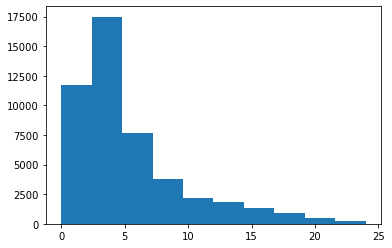

In [42]:
# Visualize the new distribution
plt.hist(df['avg_dist'])
plt.show();

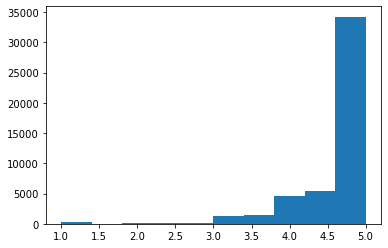

In [43]:
# Visualize the distribution of driver ratings
plt.hist(df['avg_rating_of_driver'])
plt.show();

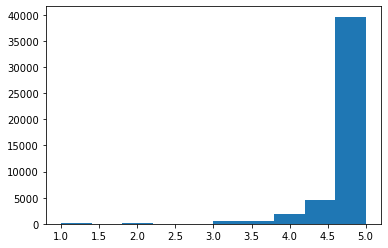

In [44]:
# Visualize the distribution of user ratings
plt.hist(df['avg_rating_by_driver'])
plt.show();

These distributions are very similar, with most ratings being high and with a long tail to the lower ratings.  This shows that for the most part both users and drivers are not having significant issues with each other.

The last thing I want to see is if anything is correlated with another column.  It is always interesting to see if features are correlated because it may allow for feature reduction when the model is eventually made.

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


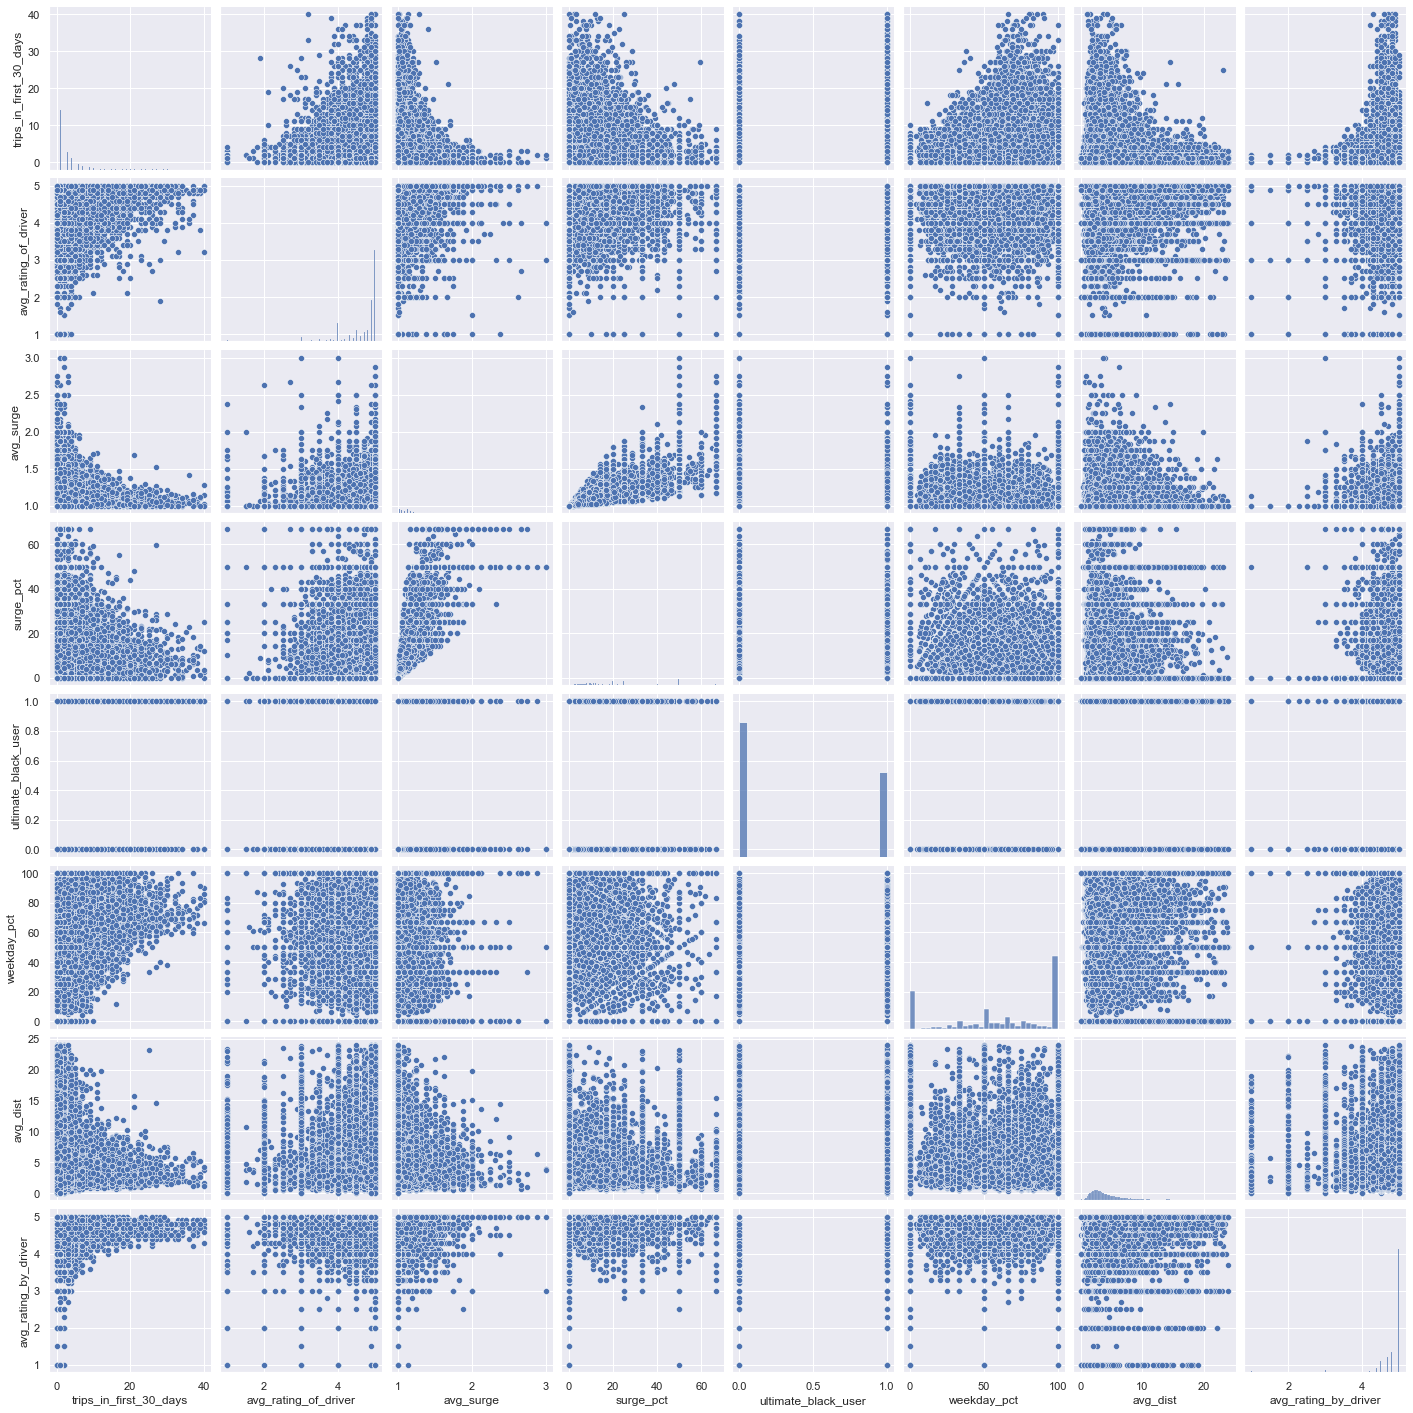

In [45]:
sns.set()
sns.pairplot(df)
plt.show()

# User Retention

Ultimate views any user who has taken a ride in the last 30 days as a retained user.  The next step of EDA is to determine how many users were retained and if there is a strong relationship between any of the features and user retention.

In [46]:
# Find the last day for which data was collected
last_day = df['last_trip_date'].max()
last_day

Timestamp('2014-07-01 00:00:00')

In [47]:
from datetime import datetime, timedelta

retained_day = last_day - timedelta(days=30)
retained_day

Timestamp('2014-06-01 00:00:00')

In [48]:
# find all users who took a trip in the 30 days before 2014-07-01
retained_df = df[df['last_trip_date'] >= retained_day]
retained_df.shape[0]

18394

There are 18394 users who have taken a ride in the 30 days leading up to the final day of this dataset and thus these are considered the retained users.

In [49]:
retained_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0


In [50]:
# Create retained column and set all users to 0 (not retained) by default
df['retained'] = 0

# Assign 1 (retained) for all users who are in retained_df
for index in df.index:
    if index in retained_df.index:
        df.at[index, 'retained'] = 1
        
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


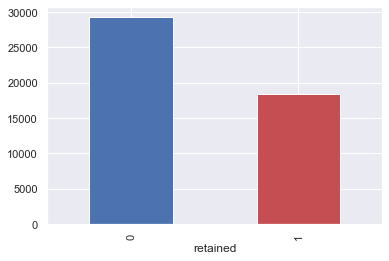

In [51]:
# Visualize the retained and not retained users
retained_users = df.groupby('retained')['retained'].count()
retained_users.plot(kind='bar', rot=90, color=['b', 'r'])
plt.show();

In [52]:
percent_retained = len(retained_df) / len(df) * 100
print('The percentage of users retained is ' + str(percent_retained) + ' %.')

The percentage of users retained is 38.57802013422818 %.


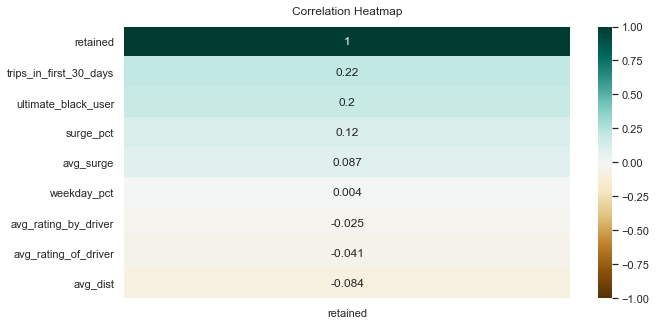

In [53]:
# Visualize each numerical feature relationship with retained using a correlation heatmap
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr()[['retained']].sort_values(by='retained', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show();

From the heatmap it seems that none of the features have a strong individual correlation with user retention.  However, there is still valuable information in this image.  Users who took more trips in the first 30 days tended to be retained, and users with higher surge_pct also tended to be retained.  There is almsot no relationship (very close to 0) for avg_surge, weekday_pct, avg_rating_by_driver, and avg_rating_of_driver, and avg_dist.

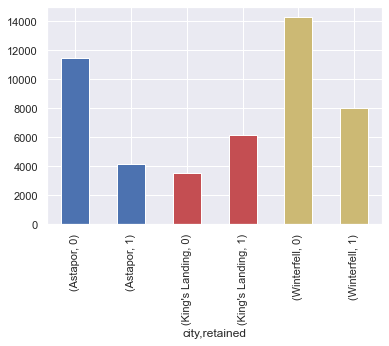

In [54]:
# Visualize the relationship between city and retained
city = df.groupby(['city', 'retained'])['retained'].count()
city.plot(kind='bar', rot=90, color=['b', 'b', 'r', 'r', 'y', 'y'])
plt.show();

Of the 3 cities, only King's Landing retained more users than it lost.  Sadly for Ultimate, King's Landing had the lowest number of users to begin.

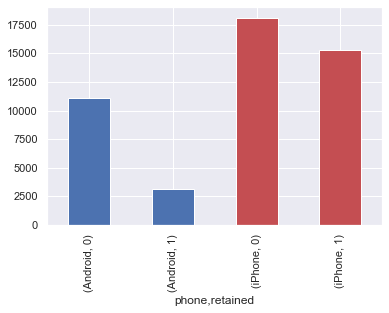

In [55]:
# Visualize phone and retained
phone = df.groupby(['phone', 'retained'])['retained'].count()
phone.plot(kind='bar', rot=90, color=['b', 'b', 'r', 'r'])
plt.show();

It appears that iPhone users tend to be retained more often than Android users.

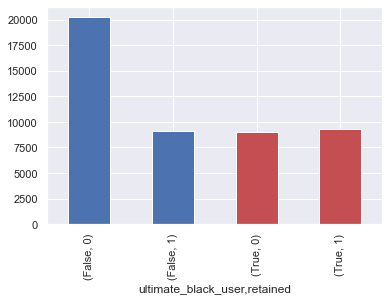

In [56]:
# Visualize ultimate_black_user and retained
ubu = df.groupby(['ultimate_black_user', 'retained'])['retained'].count()
ubu.plot(kind='bar', rot=90, color=['b', 'b', 'r', 'r'])
plt.show();

Most users were note ultimate black users, and most of the non-ultimate black users were not retained.  However, the plot above shows that a little more than half of the ultimate black users were retained.

# Save Data
Now that the data has been cleaned and explored it is ready to be pre-processed.  This will happen in another notebook so the data will be saved for future use.

In [57]:
df.to_csv('clean_data')